In [237]:
import numpy as np
import matplotlib.pyplot as plt
import math

Fixing certain constant parameters for the FitzHugh-Nagumo Model as given in the question.

In [238]:
# a is the parameter that influences the threshold for excitation.
a = 0.5 
# b is the parameter that influences how quickly the system returns to a stable state after excitation.
b = 0.1
r = 0.1

Defining the essential parametric functions that are a part of the FitzHugh-Nagumo Model, whih is a simplified mathematical model of excitable systems.

These functions include two main variables:

**`v`**: The membrane potential 

**`w`**: The recovery variable

In [239]:
def f(v, a = 0.5):
    """
    Definition of f(v) in the FitzHugh-Nagumo Model
    """
    return v * (a - v) * (v - 1)

def dv_dt(v, w, I):
    """
    Definition of a first order equation defining the FitzHugh-Nagumo Model
    """
    return f(v) - w + I

def dw_dt(v, w, b = 0.1, r = 0.1):
    """
    Definition of a first order equation defining the FitzHugh-Nagumo Model
    """
    return b * v - r * w

Defining the null-clines as well as the euler integration methods that are essential to evaluate the FitzHugh-Nagumo Model

In [240]:
def v_null_cline(v, I):
    """
    v-null cline represents the set of points in the phase space (v,w) at which the rate of change of membrane potential 
    ( dv / dt ) becomes zero. In other words, it is the locus of points where dv/dt = 0
    """
    v_null_cline = f(v) + I
    
    return v_null_cline

def w_null_cline(v, b=0.1, r=0.1):
    """
    w-null cline represents the set of points in the phase space (v,w) at which the rate of change of recovery variable 
    ( dw / dt ) becomes zero. In other words, it is the locus of points where dw/dt = 0
    """
    w_null_cline = b * v / r
    
    return w_null_cline

In [241]:
def single_forward_euler_integration(v, w, I, delta_t, total_time):
    """
    The purpose of the total_time is only to calculate the number of iterations
    """
    # delta_t is suggested to be taken small for greater accuracy.
    iterations = int(total_time//delta_t)
    # Create empty lists to store the membrane potential and recovery variable values
    v_val = []
    w_val = []
    for i in range(iterations):
        # Update the values of v and w using their respective rate of equations
        v = (v + delta_t * dv_dt(v, w, I))
        w = (w + delta_t * dw_dt(v, w))
        v_val.append(v)
        w_val.append(w)
        
    return v_val, w_val    

Define the functions to plot the graphs

In [248]:
# Creating a time seties plot for V(t) and W(t)
def plot_fig(v_w, title="", ylimits=(), x=None, xlimits=()):
    plt.figure()
    plt.title(title)
    color = ["r", "b"]
    # If the x value is not provided then we use the default time values to plot the function
    if not x:
        for i in v_w:
            plt.plot(i)
    # If the x value is given, plot the data against the specified time values with corresponding colors.
    else:
        for i,j in enumerate(v_w):
            plt.plot(x, j, color=color[i])
    
    # Set up the y_limits and the x_limits
    if ylimits:
        plt.ylim(ylimits)
    if xlimits:
        plt.xlim(xlimits)
    
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.legend(["V(t)", "W(t)"])
    plt.grid()
    plt.show()

In [249]:
def plot_nullclines(I, xlimits, ylimits, positions):
    # Define colors for plotting the vector fields streamlines
    color = ['gold', 'olivedrab', 'magenta', 'chocolate', 'cyan', 'pink', 'maroon', 'black']*2
    
    # Create an evenly spaced grid of v and w values within specified ranges
    v = np.linspace(xlimits[0], xlimits[1], 100)
    w = np.linspace(xlimits[0], xlimits[1], 100)

    # Create a grid of (v,w) values for the vector field calculations
    v_mesh, w_mesh = np.meshgrid(v, w)
    v_val = dv_dt(v_mesh, w_mesh, I)
    w_val = dw_dt(v_mesh, w_mesh)

    # Calculate and plot the v-nullcline and w-nullcline
    vnc = v_null_cline(v, I)
    wnc = w_null_cline(v)

    plt.figure()
    plt.plot(v, vnc, 'r', linewidth=3)
    plt.plot(v, wnc, 'b', linewidth=3)
    plt.legend(['v nullcline', 'w nullcline'])
    plt.ylim(ylimits[0], ylimits[1])
    title = "Phase Plot for I=" + str(round(I, 2))
    plt.title(title)
    plt.xlabel('v-values')
    plt.ylabel('w-vaues')

    # Plot the vector field streamlines based on the positions, which have the initial starting points independent of each other
    if positions:
        for i in range(len(positions)):
            plt.streamplot(v_mesh, w_mesh, v_val, w_val, density=2, start_points=[positions[i]], color=color[i], integration_direction="forward", arrowsize=2)
    else:
        # Plot the vector field streamlines across the entire phase space
        plt.streamplot(v_mesh, w_mesh, v_val, w_val, color=color[0])
    plt.grid()
    plt.show()

## Case 1: `I(ext) = 0`

### **(a)** Draw a Phase Plot superimposed

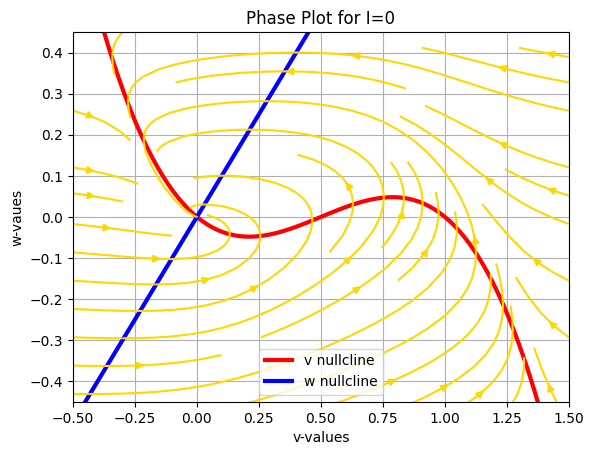

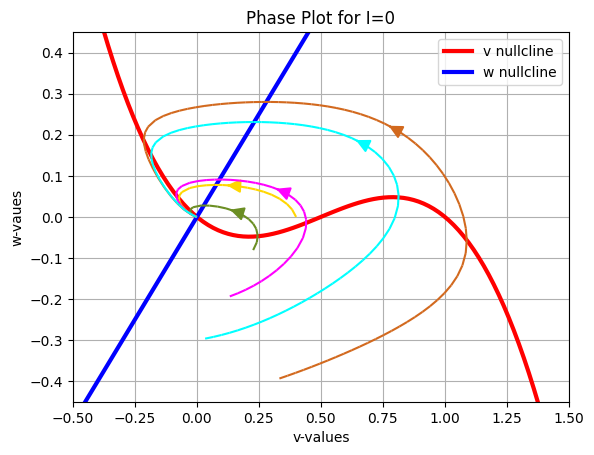

In [244]:
dt = 0.1
ttot = 100
I = 0 # Given I is 0

# Nullclines
# Plot first the entire phase space follwed by selective points alone
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [])
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0.4,0], [0.2, -0.1], [0.1, -0.2], [0.3, -0.4], [0.0, -0.3]])

### *(b)* Plot V(t) vs t and W(t) vs t and also show the trajectory on the phase plane for the both cases

**(i)** V(0) < a and W (0)= 0

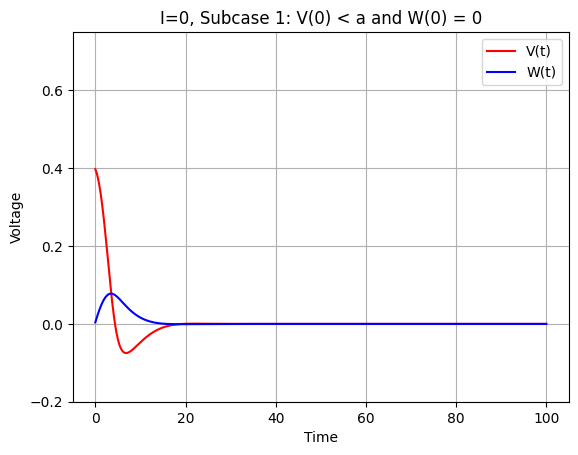

In [245]:
x = list(np.linspace(0,100,999))

# Considering V(0) to be 0.4, which is lesser than a (0.5)
# Getting the list of v and w values to plot the time series of V(t) and W(t), using Euler integration method
vhist, whist = single_forward_euler_integration(0.4, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=0, Subcase 1: V(0) < a and W(0) = 0", (-0.2,0.75), x)

**(ii)** V(0) > a and W (0)= 0

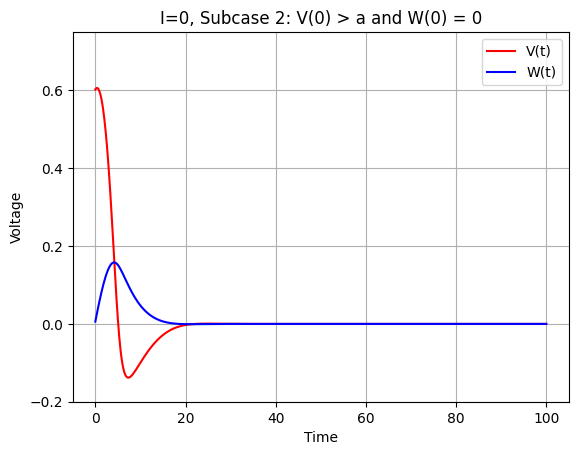

In [246]:
x = list(np.linspace(0,100,999))

# Considering V(0) to be 0.6, which is greater than a (0.5)
vhist, whist = single_forward_euler_integration(0.6, 0, I, 0.1, 100)
plot_fig([vhist, whist], "I=0, Subcase 2: V(0) > a and W(0) = 0", (-0.2,0.75), x)

In [250]:
# The logic used in the above method is being followed throughout the different cases

## Case 2: `I(1) < I(ext) < I(2)`
Choose some current value `I(1) < I(ext) < I(2)` where it exhibit oscillations. Find the values of `I(1)` and `I(2)`

### **(a)**  Draw a Phase Plot for some sample value of I(ext) 

Analysing the case of I=0.24


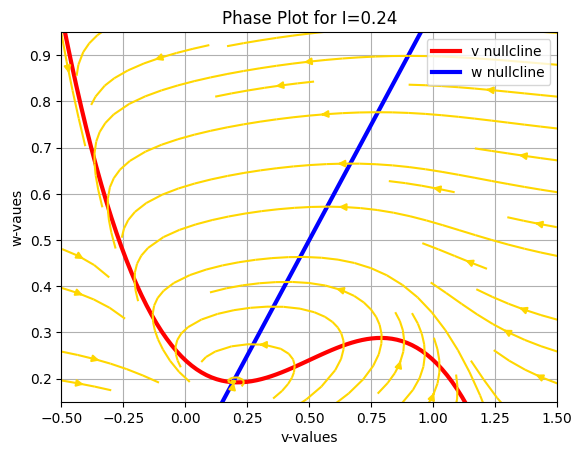

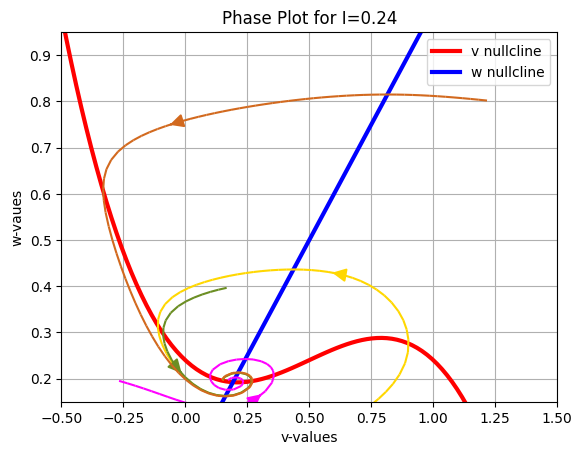

Analysing the case of I=0.25


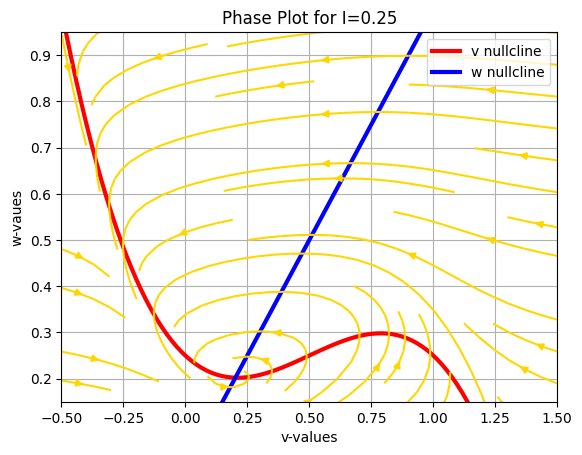

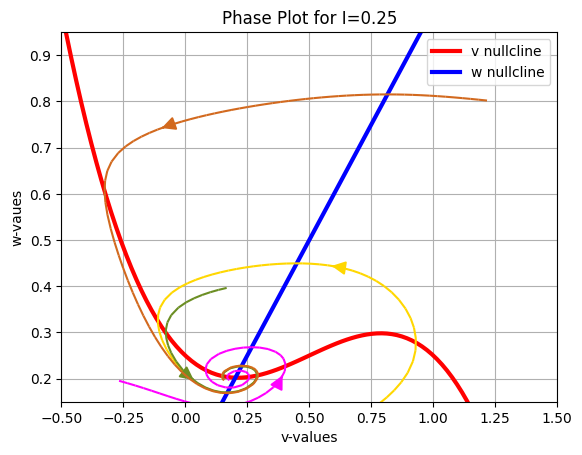

Analysing the case of I=0.26


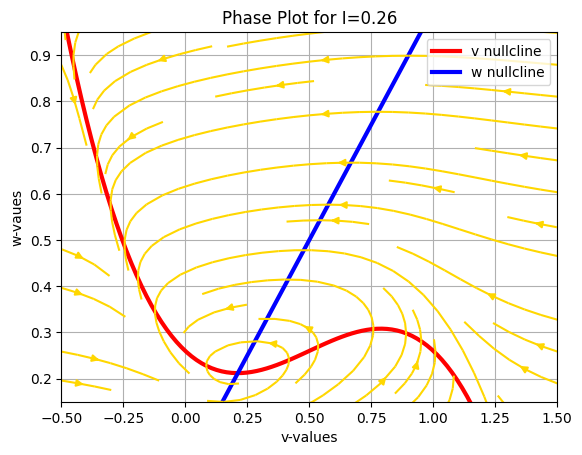

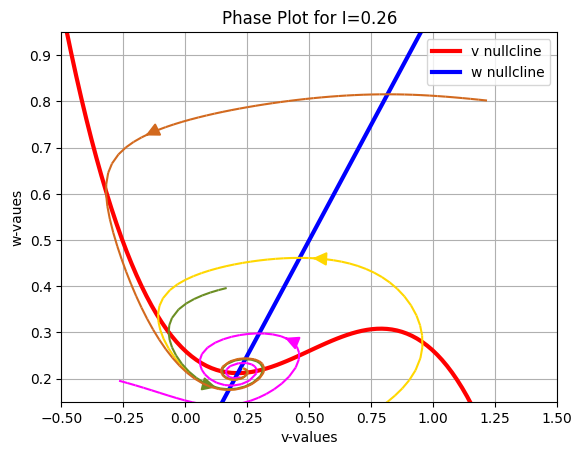

Analysing the case of I=0.27


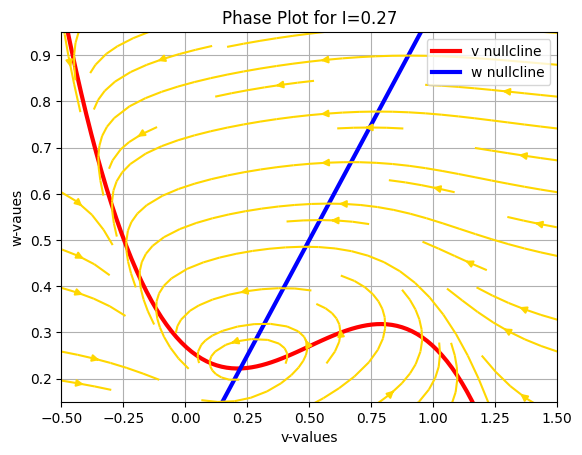

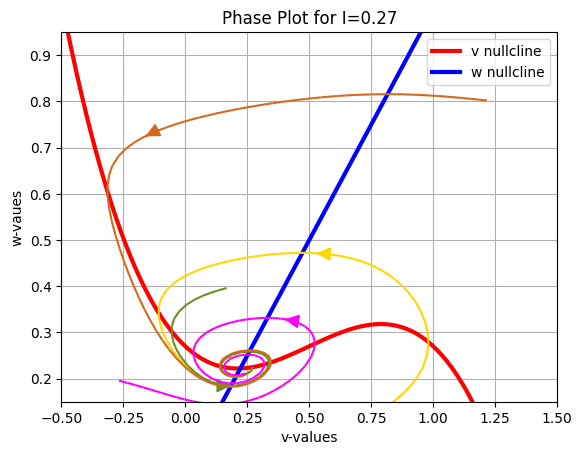

Analysing the case of I=0.28


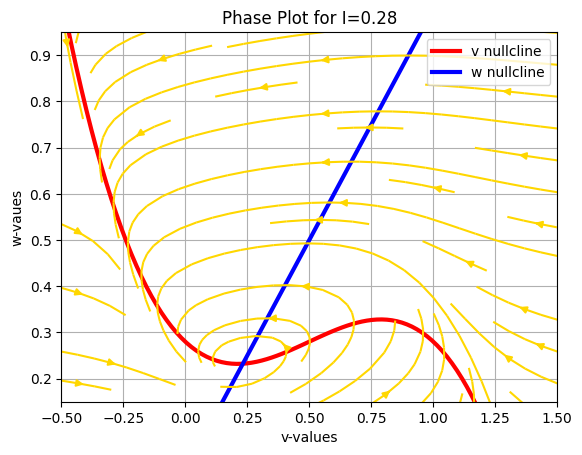

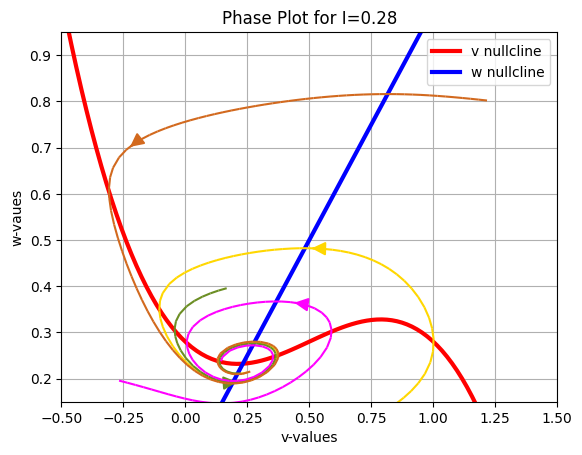

Analysing the case of I=0.3


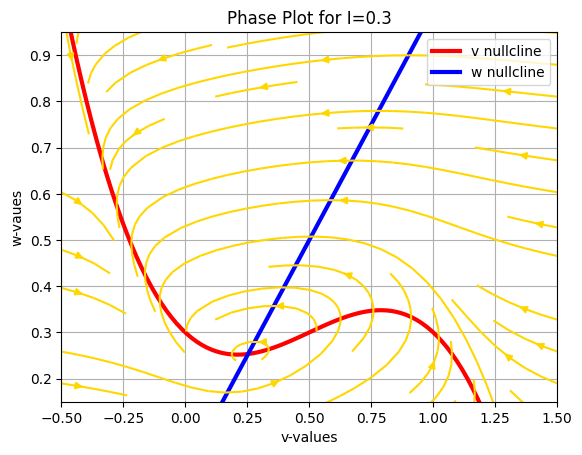

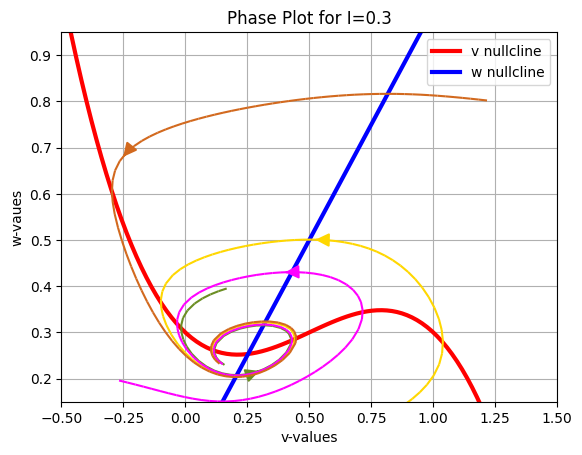

Analysing the case of I=0.4


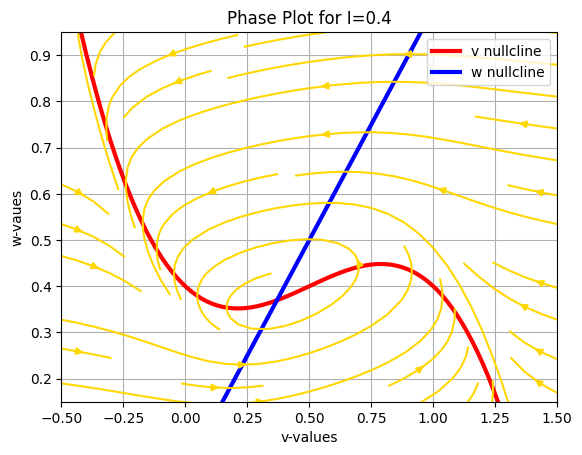

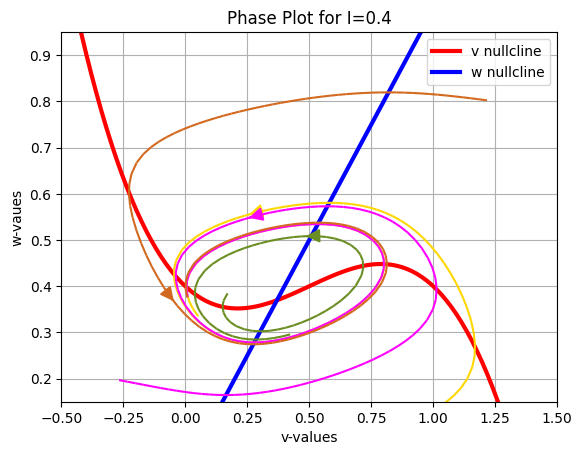

Analysing the case of I=0.5


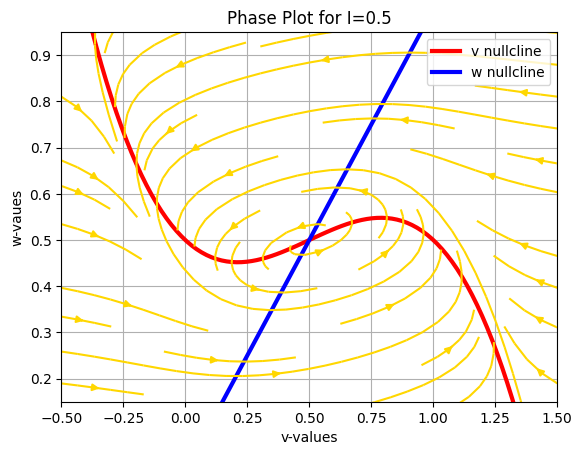

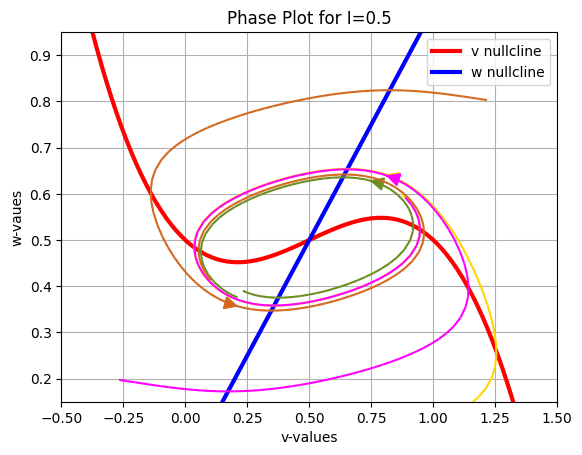

Analysing the case of I=0.6


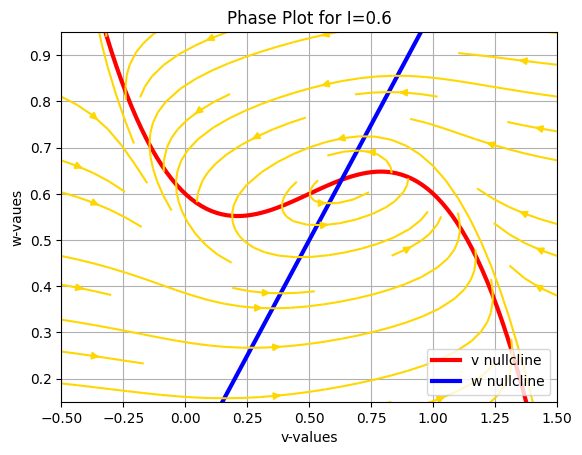

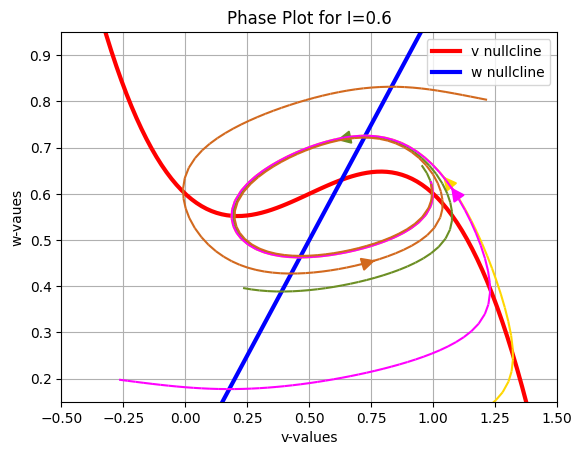

Analysing the case of I=0.7


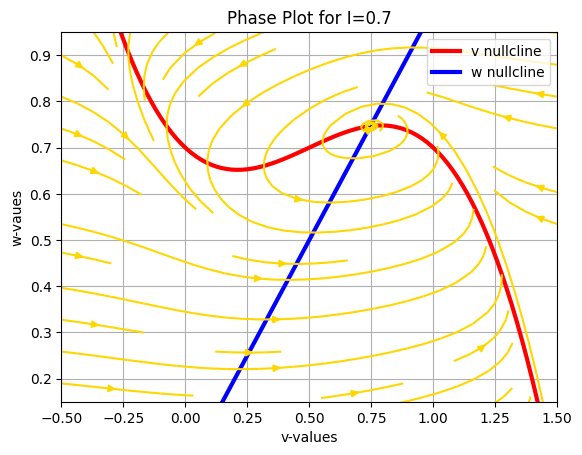

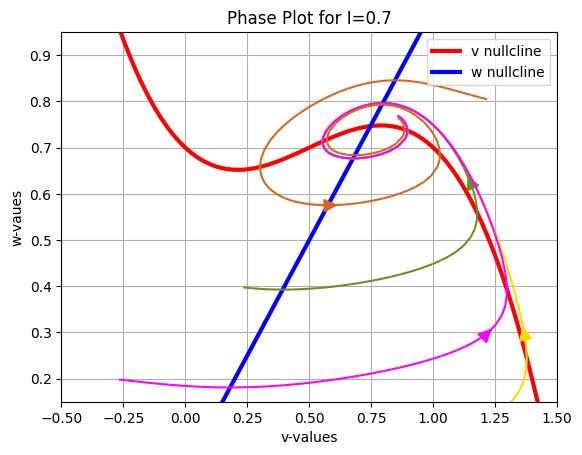

Analysing the case of I=0.71


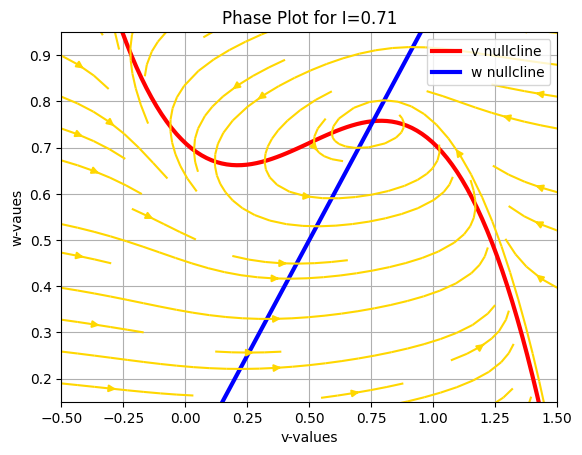

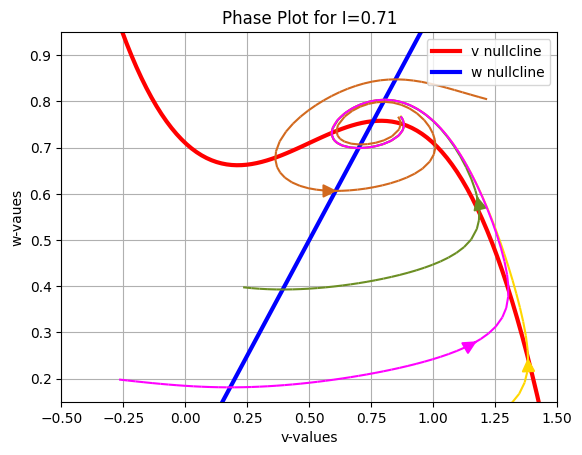

Analysing the case of I=0.72


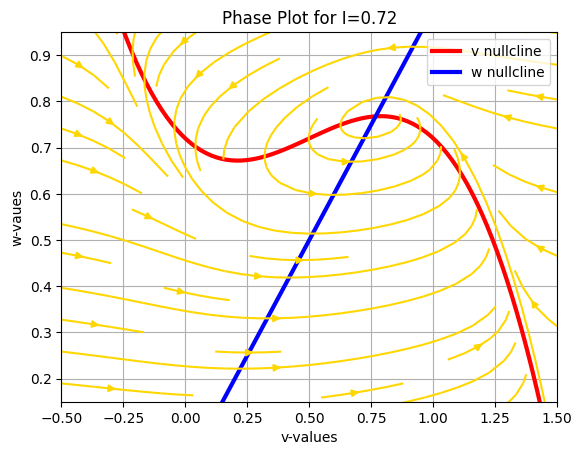

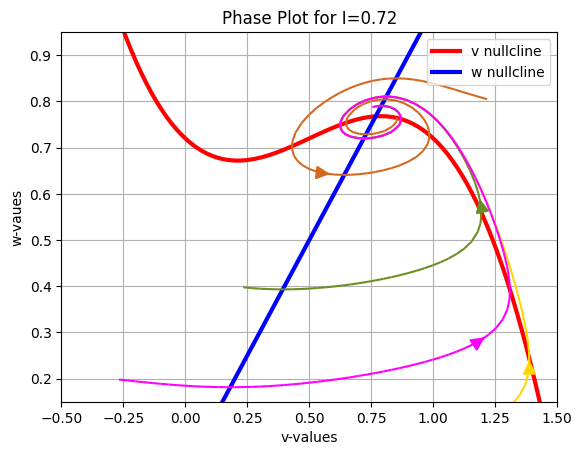

Analysing the case of I=0.73


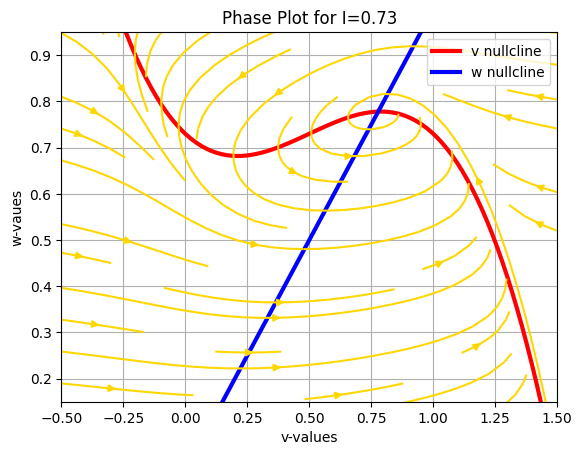

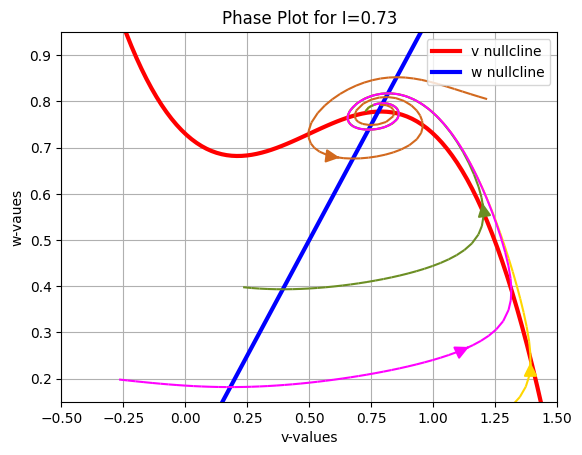

Analysing the case of I=0.74


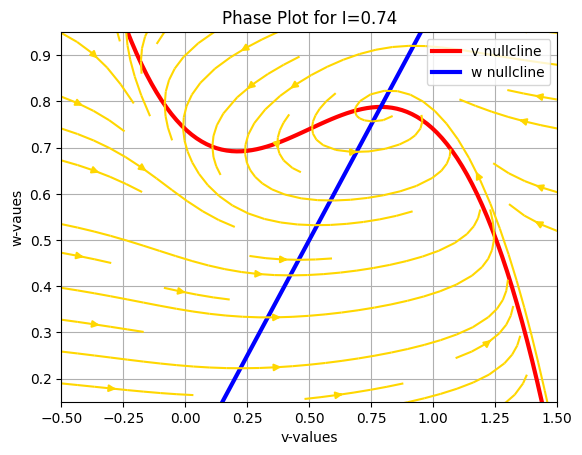

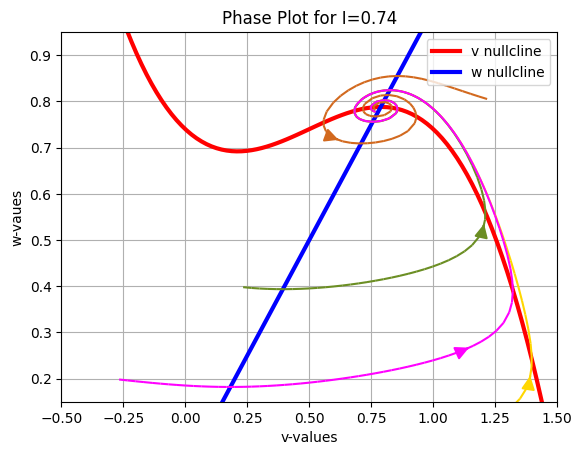

Analysing the case of I=0.75


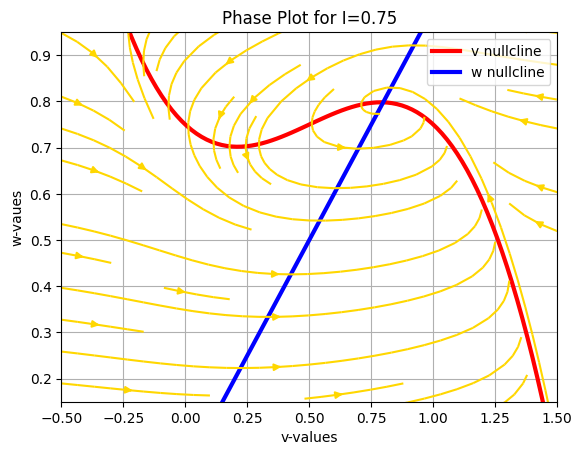

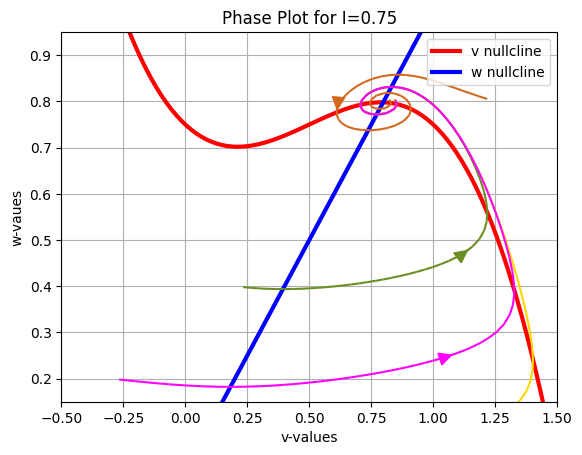

Analysing the case of I=0.76


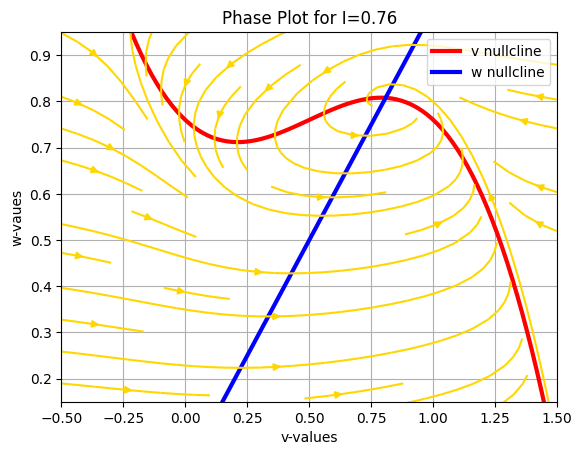

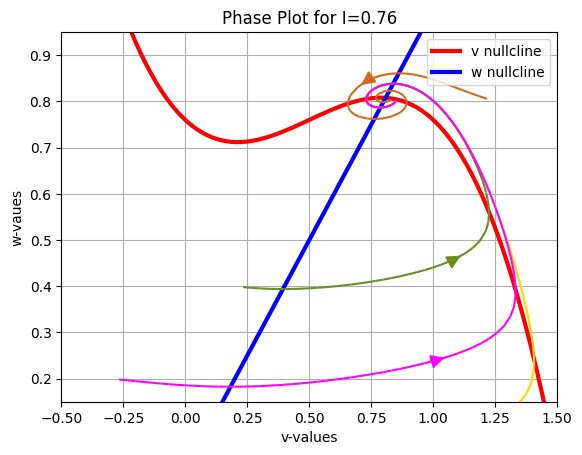

In [199]:
dt = 0.1
ttot = 100

for I in [0.24,0.25,0.26,0.27,0.28,0.3,0.4,0.5,0.6,0.7,0.71,0.72,0.73,0.74,0.75,0.76]:
    print("Analysing the case of I=",I,sep="")
    # Nullclines
    plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [])
    plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [[0,0], [0.2,0.4], [-0.3, 0.2], [1.25, 0.8]])

### **(b)**  Show that the fixed point is unstable i.e., for a small perturbation there is a no return to the fixed point (show the trajectory on the phase plane) – also show limit cycle on the phase plane

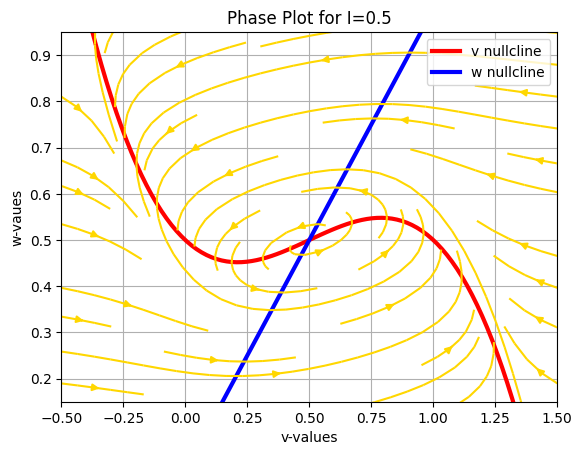

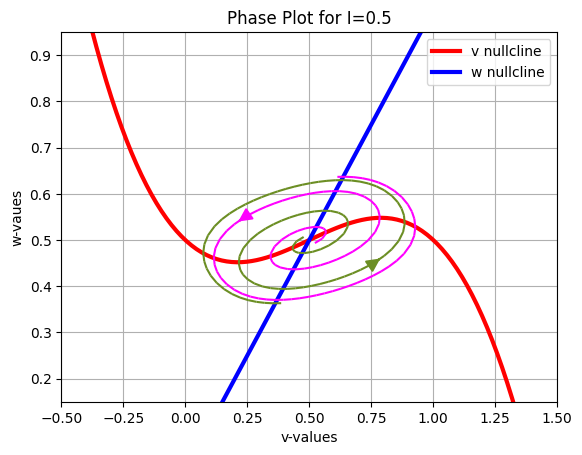

In [219]:
dt = 0.1
ttot = 100
I = 0.5
# Nullclines
plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [])
plot_nullclines(I, (-0.5,1.5), (0.15,0.95), [[0.5,0.5], [0.51,0.51], [0.49,0.49]])

### **(c)** Plot V(t) vs t and W(t) vs t

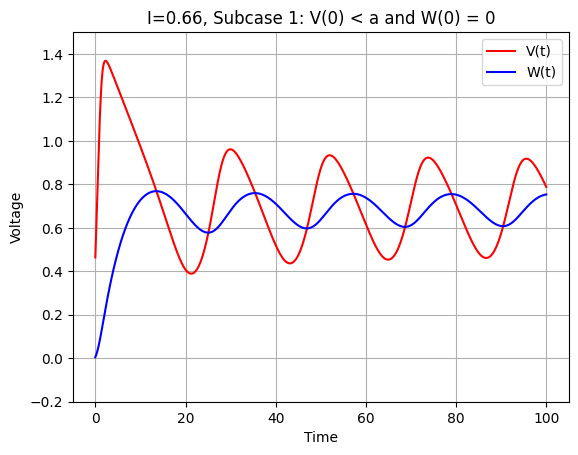

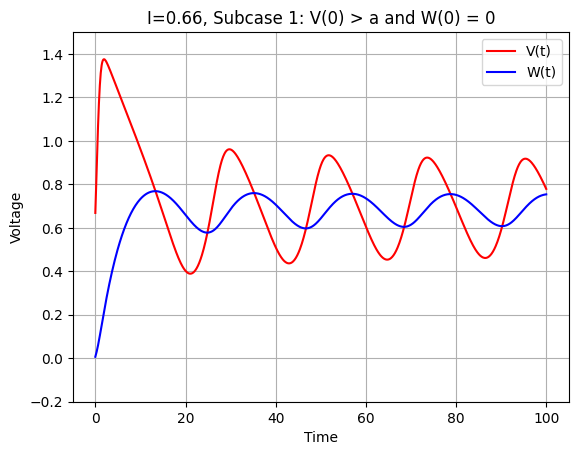

In [247]:
x = list(np.linspace(0,100,999))
I = 0.66

# Subcase 1: V(0) < a and W(0) = 0
vhist, whist = single_forward_euler_integration(0.4, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=0.66, Subcase 1: V(0) < a and W(0) = 0", (-0.2,1.5), x)

# Subcase 1: V(0) > a and W(0) = 0
vhist, whist = single_forward_euler_integration(0.6, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=0.66, Subcase 1: V(0) > a and W(0) = 0", (-0.2,1.5), x)

## Case 3
Choose some `I(ext) > I(2)`

### **(a)** Draw a Phase Plot superimposed

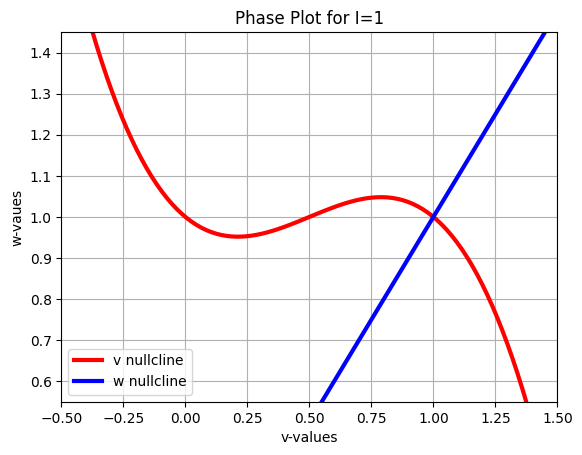

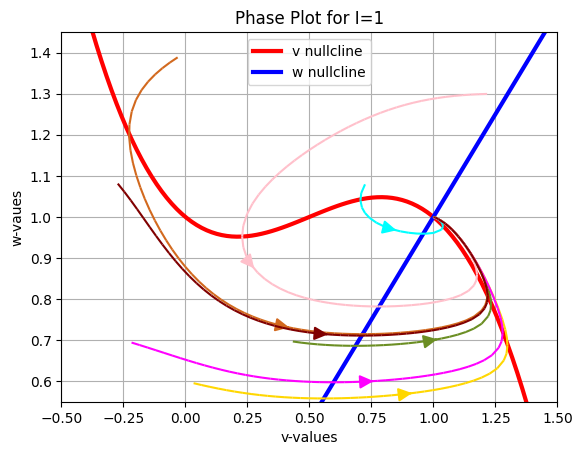

In [183]:
# Case 3: I_ext = 1
dt = 0.1
ttot = 100
I = 1
# Nullclines
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [[0,0]])
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [[0,0.6], [0.4,0.7], [-0.25, 0.7], [0,1.4], [0.75,1.1], [1.25, 1.3], [-0.3, 1.1]])

### **(b)** Show that the fixed point is stable i.e., for a small perturbation there is a return to the fixed point (show the trajectory on the phase plane)


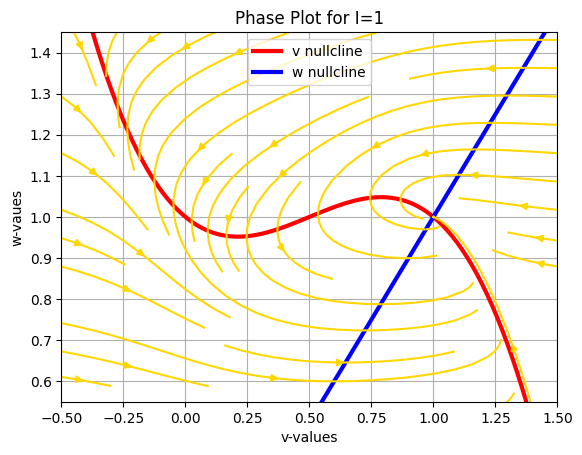

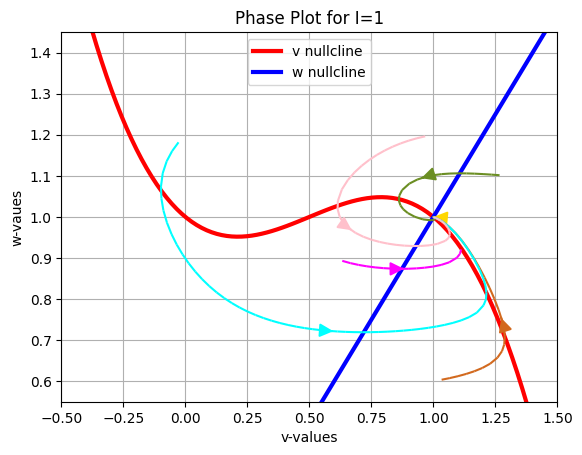

In [184]:
dt = 0.1
ttot = 100
I = 1
# Nullclines
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [])
plot_nullclines(I, (-0.5,1.5), (0.55,1.45), [[1.0,1.0], [1.3,1.1], [0.6,0.9], [1.0,0.6], [0.0, 1.2], [1.0,1.2]])

### **(c)** Plot V(t) vs t and W(t) vs t

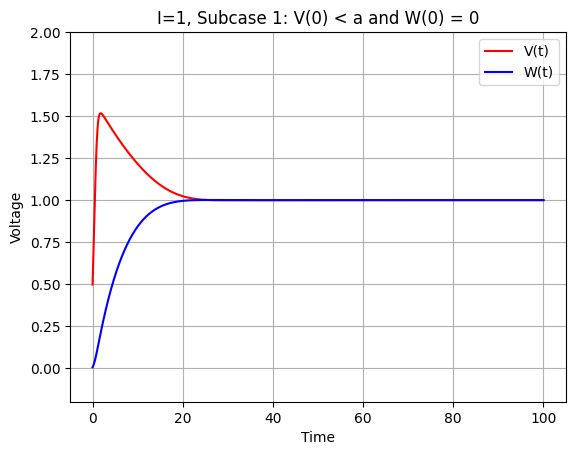

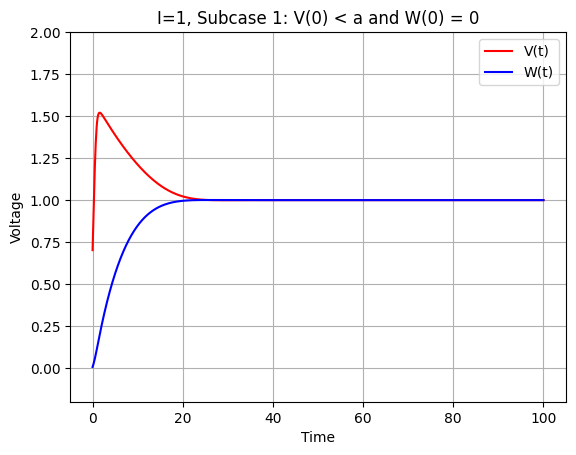

In [185]:
# Subcase 1: V(0) < a and W(0) = 0
x = list(np.linspace(0,100,999))
vhist, whist = single_forward_euler_integration(0.4, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=1, Subcase 1: V(0) < a and W(0) = 0", (-0.2,2), x)

# Subcase 1: V(0) > a and W(0) = 0
vhist, whist = single_forward_euler_integration(0.6, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=1, Subcase 1: V(0) < a and W(0) = 0", (-0.2,2), x)

## Case 4: `I(ext) and (b/r) for Bi-stability`
Find suitable values of `I(ext)` and `(b/r)` such that the graph looks as phase plot shown as below.
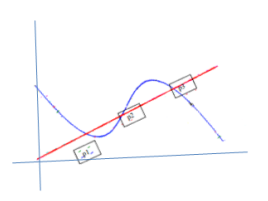

### **(a)** Redraw the Phase plot

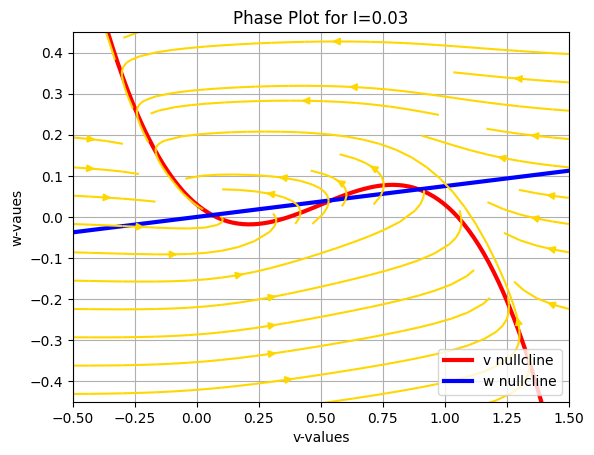

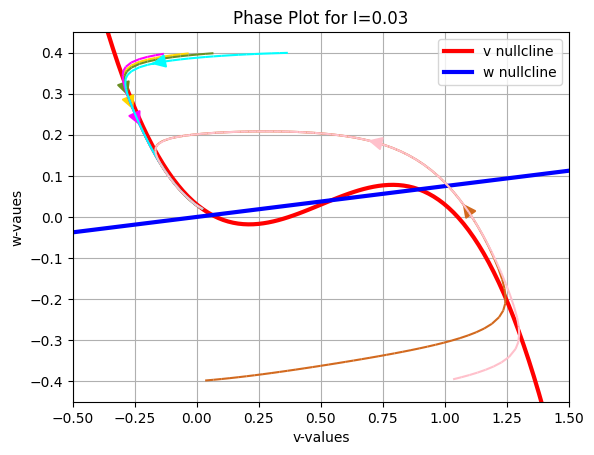

In [204]:
dt = 0.1
ttot = 100
I = 0.03

# Choosing parameters
b, r = 0.0375, 0.5

# Nullclines
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [])
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0,0.4], [0.1,0.4], [-0.1,0.4], [0,-0.4], [0.4,0.4], [1, -0.4]])

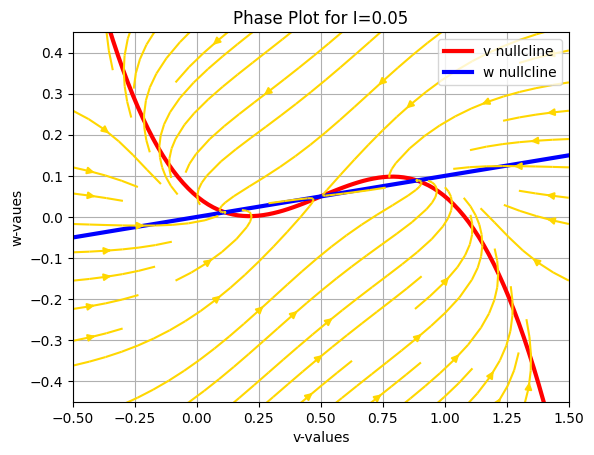

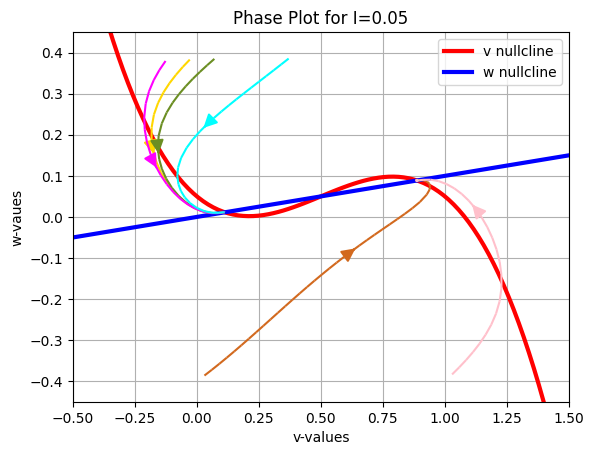

In [207]:
dt = 0.1
ttot = 100
I = 0.05

# Choosing parameters
b, r = 0.05, 0.5

# Nullclines
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [])
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0,0.4], [0.1,0.4], [-0.1,0.4], [0,-0.4], [0.4,0.4], [1, -0.4]])

### **(b)** Show stability of P1, P2, P3

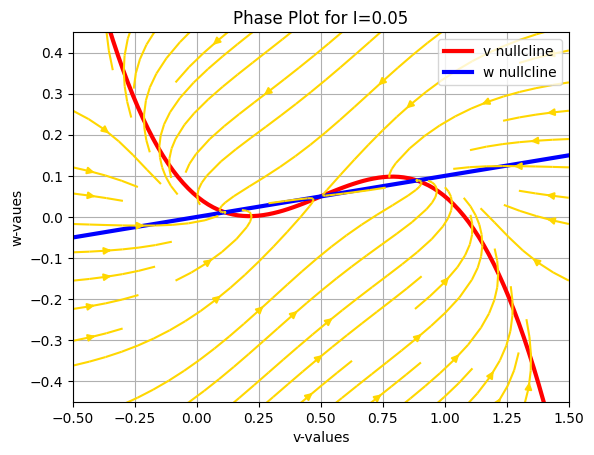

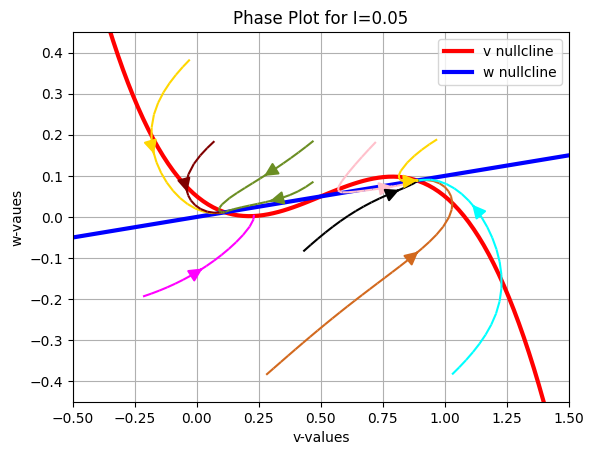

In [169]:
dt = 0.1
ttot = 100
I = 0.05

# Choosing parameters
b, r = 0.05, 0.5

# Nullclines
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [])
plot_nullclines(I, (-0.5,1.5), (-0.45,0.45), [[0,0.4], [0.5,0.1], [-0.25,-0.2], [0.25,-0.4], [1, -0.4], [0.75,0.2],
                                             [0.1,0.2], [0.4,-0.1], [1.0,0.2], [0.5,0.2]])

### **(c)** Plot V(t) vs t and W(t) vs t

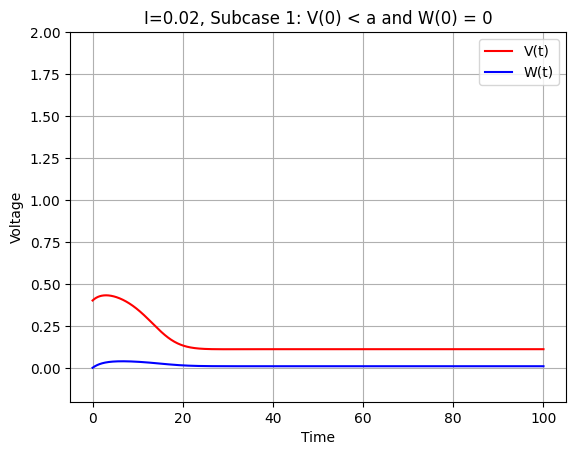

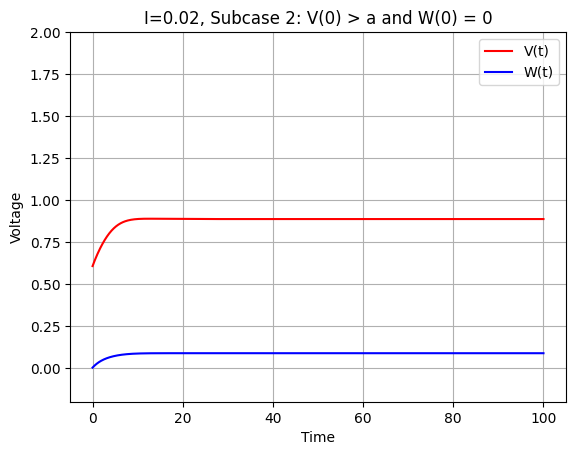

In [170]:
# Subcase 1: V(0) < a and W(0) = 0
x = list(np.linspace(0,100,999))
vhist, whist = single_forward_euler_integration(0.4, 0, I, dt, ttot)
plot_fig([vhist, whist], "I=0.02, Subcase 1: V(0) < a and W(0) = 0", (-0.2,2), x)

# Subcase 2: V(0) > a and W(0) = 0
vhist, whist = single_forward_euler_integration(0.6, 0, I, 0.1, 100)
plot_fig([vhist, whist], "I=0.02, Subcase 2: V(0) > a and W(0) = 0", (-0.2,2), x)